### imports

In [37]:
import os
import warnings
warnings.filterwarnings("ignore")
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import ticker, cm
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from IPython.display import clear_output

from ipynb.fs.full.optimizedTIO_paper import refAccuracyScheduler

clear_output()

#### display 

In [92]:
names = ['constant','tunable','poly3','linear']

# structure: Fxk,accum_k,omega_count,best_certified_value,accuracy_k

REPS = int(5)

n = int(100)
d = int(50)

if d>=n:
    r = 0
    bar_delta_list = ['0.009','0.0001','1e-06']

else:
    r = 1/2
    bar_delta_list = ['0.1','0.001','1e-05']
    
    
# F star
if r==0:
    correction = -0.29355952005718755
else:
    correction = 0.7153351389574667


title = lambda name,bar_delta: 'n_'+str(n)+'_d_'+str(d)+'_r_'+str(r)+'_reg_online_'+name+'_'+bar_delta+'.npy'
condition_str = '5e-05'


data = {names[0]:{bar_delta_list[0]:{'values':None,'work':None},bar_delta_list[1]:{'values':None,'work':None},bar_delta_list[2]:{'values':None,'work':None}},\
        names[1]:{bar_delta_list[0]:{'values':None,'work':None},bar_delta_list[1]:{'values':None,'work':None},bar_delta_list[2]:{'values':None,'work':None}},\
        names[2]:{bar_delta_list[0]:{'values':None,'work':None},bar_delta_list[1]:{'values':None,'work':None},bar_delta_list[2]:{'values':None,'work':None}},\
        names[3]:{bar_delta_list[0]:{'values':None,'work':None},bar_delta_list[1]:{'values':None,'work':None},bar_delta_list[2]:{'values':None,'work':None}}
       }

for name in names:
    for bar_delta in bar_delta_list:
        raw = np.load(title(name,bar_delta),allow_pickle=True)
        buf_val,buf_work = None,None
        line_val,line_work = [],[]
        last_omega = -np.inf
        for val,omega in zip(raw[:,0].flatten(),raw[:,2].flatten()):
            line_val.append(val)
            line_work.append(omega)

            if omega>last_omega:
                last_omega = omega
            else:
                last_omega = -np.inf
                if buf_val is None:
                    buf_val = np.array(line_val)
                    buf_val = buf_val.reshape((1,len(buf_val)))
                else:
                    shape_val = buf_val.shape
                    new_length = len(line_val)
                    if new_length<=shape_val[1]:
                        buf_val = np.vstack((buf_val,np.concatenate((line_val,np.nan*np.ones(shape_val[1]-new_length)))))
                    else:
                        max_buf_val = np.nan*np.ones((shape_val[0]+1,new_length))
                        max_buf_val[:shape_val[0],:shape_val[1]] = buf_val.copy()
                        max_buf_val[-1] = line_val
                        buf_val = max_buf_val.copy()
                if buf_work is None:
                    buf_work = np.array(line_work)
                    buf_work = buf_work.reshape((1,len(buf_work)))
                else:
                    shape_work = buf_work.shape
                    new_length = len(line_work)
                    if new_length<=shape_work[1]:
                        buf_work = np.vstack((buf_work,np.concatenate((line_work,np.nan*np.ones(shape_work[1]-new_length)))))
                    else:
                        max_buf_work = np.nan*np.ones((shape_work[0]+1,new_length))
                        max_buf_work[:shape_work[0],:shape_work[1]] = buf_work.copy()
                        max_buf_work[-1] = line_work
                        buf_work = max_buf_work.copy()
                line_val,line_work = [],[] # new rep
        data[name][bar_delta]['values'] = buf_val-correction
        data[name][bar_delta]['work'] = buf_work

In [99]:
data['constant']['0.001']['values']

array([[0.14160286, 0.01621651, 0.00456152, 0.00136976, 0.00168677,
        0.00697902, 0.00226976, 0.00144798, 0.00308292, 0.00123015,
        0.00101085, 0.0007019 , 0.00087784, 0.0005799 , 0.00085961,
        0.00079082, 0.00058688, 0.00068205, 0.00064218, 0.00090052,
        0.00101879, 0.00111549, 0.0009834 , 0.00141906, 0.00128063,
        0.00214363, 0.00101373, 0.00116655, 0.00223536, 0.00104592,
        0.00091606, 0.00102499, 0.00133564, 0.00087875, 0.00099198,
        0.00094752, 0.00077068, 0.00114153, 0.00067586, 0.00098174,
        0.00084729, 0.00137725, 0.00089199, 0.00119307, 0.0007944 ,
        0.00145433, 0.00200815, 0.00218407, 0.00186625, 0.00181747,
        0.00142701, 0.00117713, 0.00105336, 0.00139727, 0.00174063,
        0.00140247, 0.00113267, 0.00132876, 0.00086255, 0.00096453,
        0.00110745, 0.00168729, 0.00115335, 0.00135312, 0.00103532,
        0.00137823, 0.00092357, 0.0020396 , 0.00186403, 0.00087062,
        0.00143704, 0.00174322, 0.00147896, 0.00

In [88]:
colors_delta = ['tab:red','tab:purple','tab:orange']
lines = ['dashed','solid','dotted','dashdot']

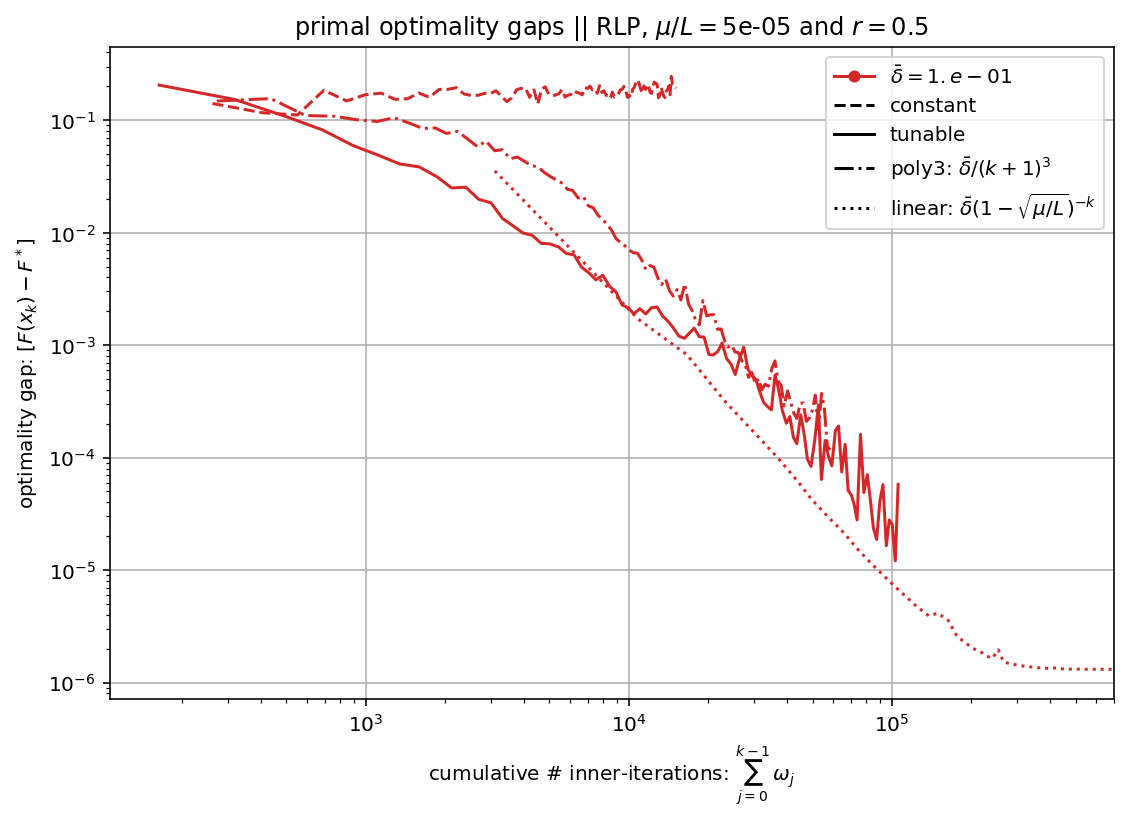

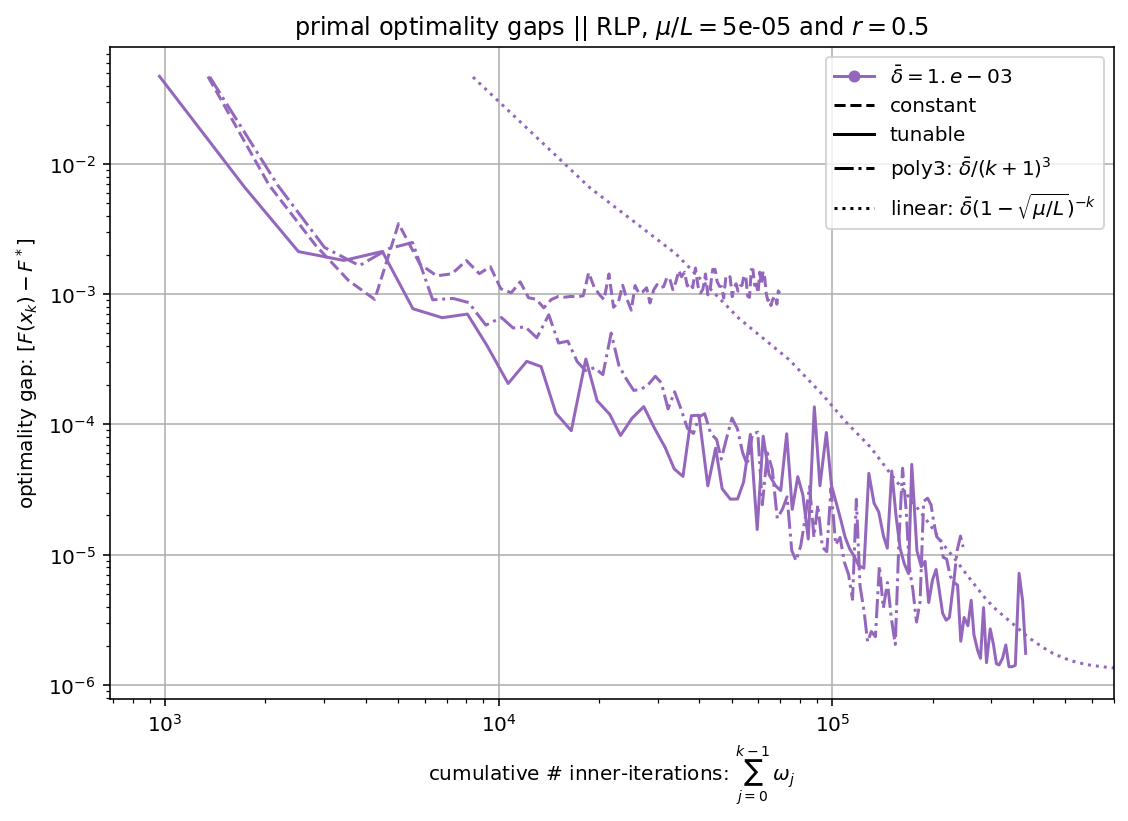

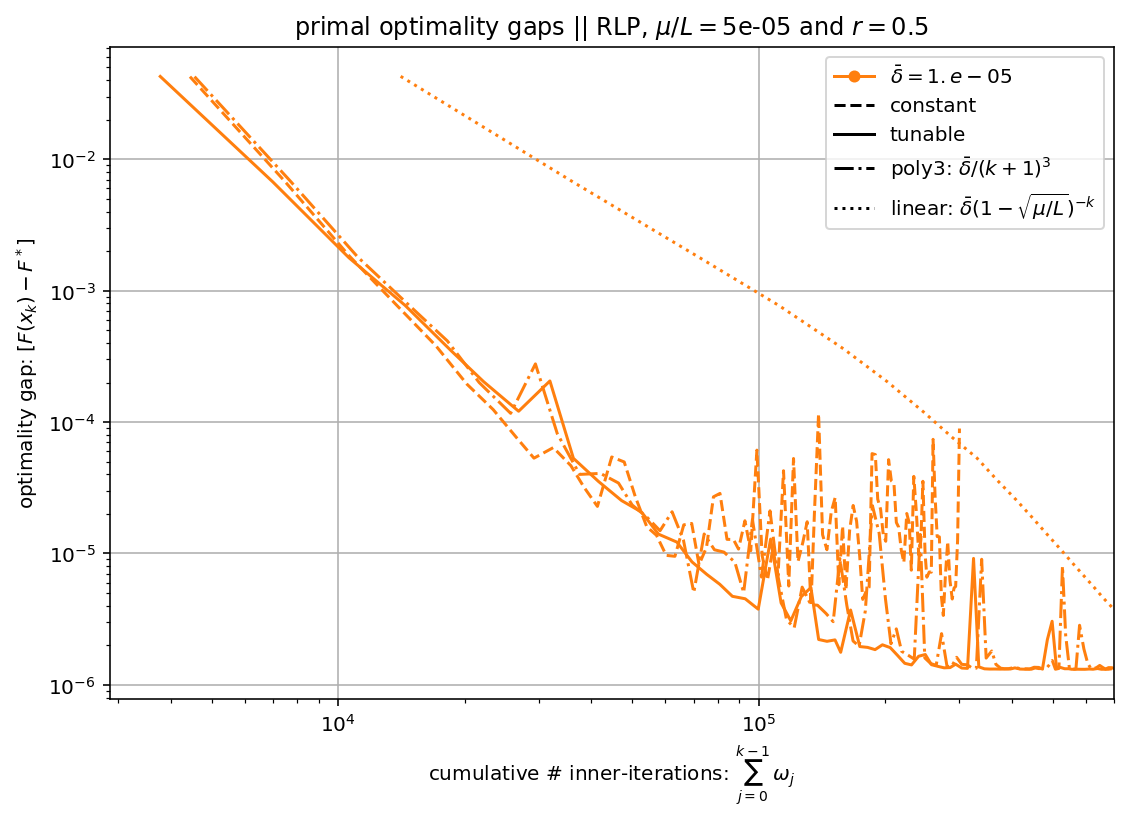

In [106]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# create manual symbols for legend
if r==0:

    del_low = Line2D([0], [0], label='$\\bar{\\delta} = 9.e-03$', marker=".", markersize=10,color=colors_delta[0])
    del_mid = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-04$', marker=".", markersize=10,color=colors_delta[1])
    del_acc = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-06$', marker=".", markersize=10,color=colors_delta[2])

else:
    del_low = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-01$', marker=".", markersize=10,color=colors_delta[0])
    del_mid = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-03$', marker=".", markersize=10,color=colors_delta[1])
    del_acc = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-05$', marker=".", markersize=10,color=colors_delta[2])

line_constant = Line2D([0], [0], label='constant', color='k',linestyle='--')
line_tunable = Line2D([0], [0], label='tunable', color='k',linestyle='-')

line_poly3 = Line2D([0], [0], label='poly3: $\\bar{\\delta} / (k+1)^3$', color='k',linestyle='dashdot')
line_linear = Line2D([0], [0], label='linear: $\\bar{\\delta} (1-\\sqrt{\\mu / L})^{-k}$', color='k',linestyle='dotted')


counter = 0
for col,bar_delta in zip(colors_delta,bar_delta_list):
    plt.figure(figsize=(9,6))
    plt.title('primal optimality gaps || RLP, $\\mu / L = $'+condition_str+' and $r = $'+str(r))

    plt.grid()

    # access legend objects automatically created from data
    handles, labels = plt.gca().get_legend_handles_labels()

    # add manual symbols to auto legend
    if counter==0:
        handles.extend([del_low,line_constant, line_tunable,line_poly3,line_linear])
    elif counter==1:
        handles.extend([del_mid,line_constant, line_tunable,line_poly3,line_linear])

    else:
        handles.extend([del_acc,line_constant, line_tunable,line_poly3,line_linear])
        
    for lin,name in zip(lines,names):
        data_values = np.mean(data[name][bar_delta]['values'],0)[:-2]
        data_work = np.mean(data[name][bar_delta]['work'],0)[:-2]
        plt.loglog(data_work,data_values, color=col,linestyle=lin)


    plt.ylabel('optimality gap: [$F(x_k)-F^*$]')
    plt.xlabel('cumulative # inner-iterations: $\\sum_{j=0}^{k-1}\,\\omega_j$') 
    plt.legend(handles=handles);
    plt.xlim([None,7e5])

    counter +=1 

    plt.savefig('bd_'+str(bar_delta)+'_r_'+str(r)+'.pdf',dpi=600)
